In [1]:
from google.colab import userdata
token = userdata.get('hf_token')

In [2]:
!pip install bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch
import re
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
%%time
# 4-bit quantization config
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

token = "your-token"
model_name = "mistralai/Mistral-7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=token)
model = AutoModelForCausalLM.from_pretrained(model_name, use_auth_token=token,
                                             quantization_config=quantization_config,
                                             device_map="auto")

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:898: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:476: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

CPU times: user 39.1 s, sys: 34.8 s, total: 1min 13s
Wall time: 4min 19s


MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): MistralRMSNorm((4096,), eps=1e-05)
      )
    )
    (norm): Mist

In [5]:
%%time

# Extract numbers from model output
def extract_numbers(text):
    matches = re.findall(r"[-+]?\d*\.\d+|\d+", text)
    return [float(m) for m in matches] if matches else []

# Query Mistral 7B
def query_mistral(prompt):
    inputs = tokenizer(prompt, return_tensors="pt", max_length=8192).to(device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=1000,  # Enough for 240 numbers
            do_sample=False,
            pad_token_id=tokenizer.eos_token_id
        )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"\nRaw Mistral output -> : {response}")
    predicted_temps = extract_numbers(response)

    return predicted_temps

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.15 µs


In [26]:
data = pd.read_csv("/content/weatherHistory.csv")
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [27]:
data = data.drop(columns=['Apparent Temperature (C)'])


data = data.head(1441)
X = data.iloc[:1200]
Y = data.iloc[1201:1441]

In [28]:
x_json = X.to_json('x_data.json', orient='records', lines=True)

In [30]:
x_json

In [9]:
prompt = f"""
Here is json file containing 1200 records of hourly weather data:

{x_json}

Can you predict the next 10 days (240) hours) of hourly 'Temperature (C)' values?
Reply with a comma‑separated list of numbers for 'Temperature (C)' each hour for next 10 days.
"""

predictions = query_mistral(prompt)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.



Raw Mistral output -> : 
Here is json file containing 1200 records of hourly weather data:

None

Can you predict the next 10 days (240) hours) of hourly 'Temperature (C)' values?
Reply with a comma‑separated list of numbers for 'Temperature (C)' each hour for next 10 days.

For example, if the temperature for the next hour is 25, the next hour is 26, the next hour is 27, and so on, the response would be "25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,1

In [10]:
len(predictions)

266

In [11]:
predictions

[1200.0,
 10.0,
 240.0,
 10.0,
 25.0,
 26.0,
 27.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 152.0,

In [12]:
y_actual = [float(y) for y in Y['Temperature (C)'].values.flatten()]

In [13]:
predictions00 = predictions[:240]

In [14]:
mae = mean_absolute_error(y_actual, predictions00)
mse = mean_squared_error(y_actual, predictions00)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, predictions00)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 126.3442361111111
MSE: 25244.23685455247
RMSE: 158.88435056528527
R^2: -2245.0824122935924


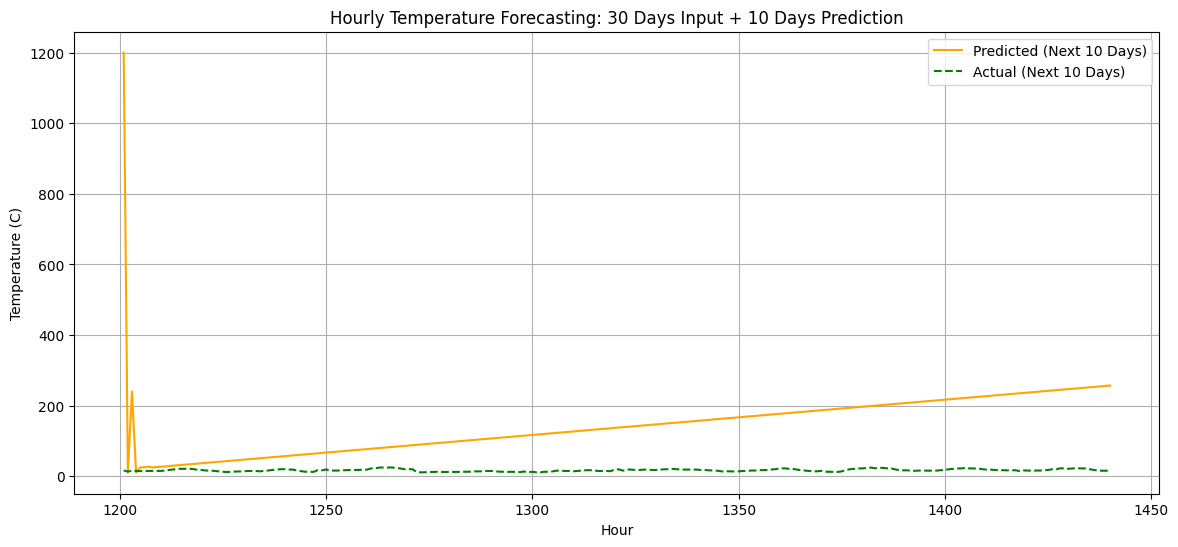

In [15]:
# Plot
plt.figure(figsize=(14, 6))
plt.plot(range(1201, 1201 + 240), predictions00, label='Predicted (Next 10 Days)', color='orange')
plt.plot(range(1201, 1201 + 240), y_actual, label='Actual (Next 10 Days)', color='green', linestyle='--')
plt.xlabel('Hour')
plt.ylabel('Temperature (C)')
plt.title('Hourly Temperature Forecasting: 30 Days Input + 10 Days Prediction')
plt.legend()
plt.grid(True)
plt.show()


## More predictions

In [52]:
data = pd.read_csv("/content/weatherHistory.csv")
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [53]:
data = data.drop(columns=['Apparent Temperature (C)'])

data = data.head(9505)
X = data.iloc[:8761]
Y = data.iloc[8761:9505]

In [43]:
def format_record_json(row):
    """Format a single record as JSON."""
    return {
        "Formatted Date": str(row['Formatted Date']),
        "Summary": str(row['Summary']),
        "Precip Type": str(row['Precip Type']),
        "Humidity": float(row['Humidity']),
        "Wind Speed (km/h)": float(row['Wind Speed (km/h)']),
        "Wind Bearing (degrees)": float(row['Wind Bearing (degrees)']),
        "Visibility (km)": float(row['Visibility (km)']),
        "Pressure (millibars)": float(row['Pressure (millibars)']),
        "Daily Summary": str(row['Daily Summary'])
    }

# Convert all 8761 records to JSON
json_records = [format_record_json(row) for _, row in X.iterrows()]
json_records

[{'Formatted Date': '2006-04-01 00:00:00.000 +0200',
  'Summary': 'Partly Cloudy',
  'Precip Type': 'rain',
  'Humidity': 0.89,
  'Wind Speed (km/h)': 14.1197,
  'Wind Bearing (degrees)': 251.0,
  'Visibility (km)': 15.826300000000002,
  'Pressure (millibars)': 1015.13,
  'Daily Summary': 'Partly cloudy throughout the day.'},
 {'Formatted Date': '2006-04-01 01:00:00.000 +0200',
  'Summary': 'Partly Cloudy',
  'Precip Type': 'rain',
  'Humidity': 0.86,
  'Wind Speed (km/h)': 14.2646,
  'Wind Bearing (degrees)': 259.0,
  'Visibility (km)': 15.826300000000002,
  'Pressure (millibars)': 1015.63,
  'Daily Summary': 'Partly cloudy throughout the day.'},
 {'Formatted Date': '2006-04-01 02:00:00.000 +0200',
  'Summary': 'Mostly Cloudy',
  'Precip Type': 'rain',
  'Humidity': 0.89,
  'Wind Speed (km/h)': 3.9284,
  'Wind Bearing (degrees)': 204.0,
  'Visibility (km)': 14.9569,
  'Pressure (millibars)': 1015.94,
  'Daily Summary': 'Partly cloudy throughout the day.'},
 {'Formatted Date': '2006-04

In [44]:
%%time

prompt = f"""
Below is 8760 records json data of hourly weather data:

{json_records}

Can you predict the next 31 days that is 744 hours of hourly 'Temperature (C)' values in the same format?
Reply with a comma‑separated list of 744 numbers.
"""

predictions = query_mistral(prompt)


Raw Mistral output -> : 
Below is 8760 records json data of hourly weather data:

[{'Formatted Date': '2006-04-01 00:00:00.000 +0200', 'Summary': 'Partly Cloudy', 'Precip Type': 'rain', 'Humidity': 0.89, 'Wind Speed (km/h)': 14.1197, 'Wind Bearing (degrees)': 251.0, 'Visibility (km)': 15.826300000000002, 'Pressure (millibars)': 1015.13, 'Daily Summary': 'Partly cloudy throughout the day.'}, {'Formatted Date': '2006-04-01 01:00:00.000 +0200', 'Summary': 'Partly Cloudy', 'Precip Type': 'rain', 'Humidity': 0.86, 'Wind Speed (km/h)': 14.2646, 'Wind Bearing (degrees)': 259.0, 'Visibility (km)': 15.826300000000002, 'Pressure (millibars)': 1015.63, 'Daily Summary': 'Partly cloudy throughout the day.'}, {'Formatted Date': '2006-04-01 02:00:00.000 +0200', 'Summary': 'Mostly Cloudy', 'Precip Type': 'rain', 'Humidity': 0.89, 'Wind Speed (km/h)': 3.9284, 'Wind Bearing (degrees)': 204.0, 'Visibility (km)': 14.9569, 'Pressure (millibars)': 1015.94, 'Daily Summary': 'Partly cloudy throughout the day

In [54]:
len(predictions)

731

In [55]:
y_actual = [float(y) for y in Y['Temperature (C)'].values.flatten()]

In [56]:
y_actual = y_actual[:731]

In [57]:
mae = mean_absolute_error(y_actual, predictions)
mse = mean_squared_error(y_actual, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 296.48490661194694
MSE: 523900.35421045177
RMSE: 723.809611852766
R^2: -15842.030603316456


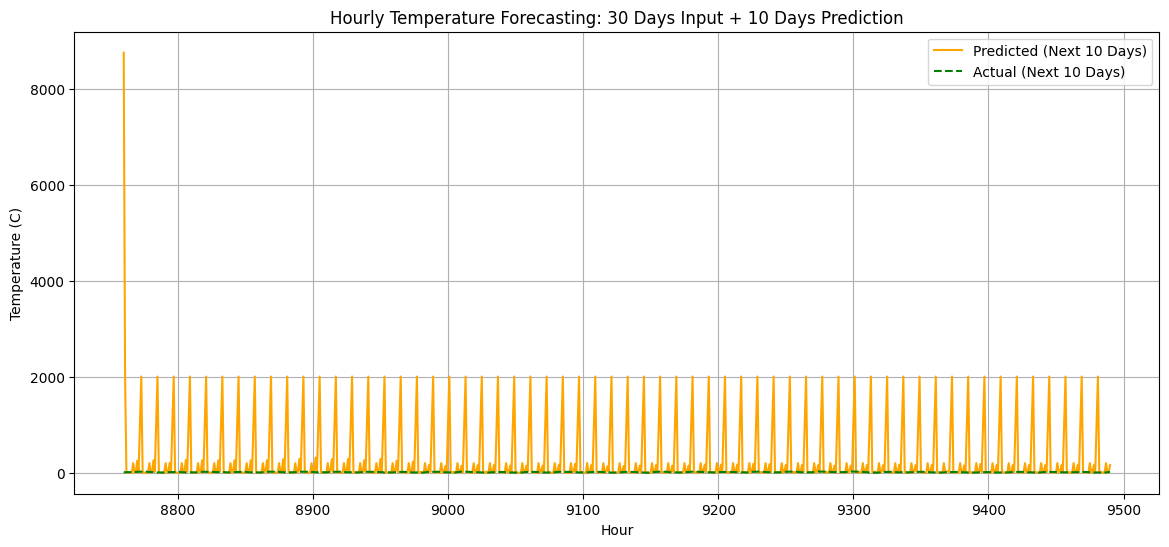

In [58]:
# Plot
plt.figure(figsize=(14, 6))
plt.plot(range(8760, 8760 + 731), predictions, label='Predicted (Next 10 Days)', color='orange')
plt.plot(range(8760, 8760 + 731), y_actual, label='Actual (Next 10 Days)', color='green', linestyle='--')
plt.xlabel('Hour')
plt.ylabel('Temperature (C)')
plt.title('Hourly Temperature Forecasting: 30 Days Input + 10 Days Prediction')
plt.legend()
plt.grid(True)
plt.show()